<a href="https://colab.research.google.com/github/DonRoboto/AprendizajeAutomatizado/blob/master/Tarea3/Tarea3_ej1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos librerias

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Función para crear y evaluar cada modelo en Entrenamiento (80%) y Validación (20%)

In [0]:
def fit_eval(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []

    m = len(X_train)
    model.fit(X_train[:m], y_train[:m])
    
    cv_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)

    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

    err_train = np.sqrt(train_errors).mean()
    err_test = np.sqrt(test_errors).mean() 
    return  err_train, err_test, cv_scores.mean()

Obtenemos datos

In [0]:
url_data = 'https://raw.githubusercontent.com/DonRoboto/AprendizajeAutomatizado/master/Tarea3/housing.data'
data = pd.read_csv(url_data,header=None, delimiter=r"\s+")
df = data.to_numpy()

X = df[:,0:13]
y = df[:,13]

#listas donde se guardarán los errores 
err_train_ridge = []
err_test_ridge = []
err_cv_ridge = []

err_train_lasso = []
err_test_lasso = []
err_cv_lasso = []

et_ridge = []
ev_ridge = []
cv_score_ridge = []
        
et_lasso = []
ev_lasso = []
cv_score_lasso = []

Modelo Ridge y Lasso

In [9]:
alpha = np.logspace(-4, 0, 50)

#experimentamos para diferentes valores de alpha
for a in alpha:
    #cada escenario lo evaluaremos por 10 experimentos
    for n in range(10):     
        polynomial_regression_ridge = Pipeline([
                ("poly_features", PolynomialFeatures(degree=20, interaction_only=True, include_bias=False)),
                ("lin_reg_ridge", Ridge(alpha=a, solver="lsqr")),
                ])
    
        polynomial_regression_lasso = Pipeline([
                ("poly_features", PolynomialFeatures(degree=20, interaction_only=True, include_bias=False)),
                ("lin_reg_lasso", Lasso(alpha=a, tol=0.1)),
                ])

        et_ridge_ex, ev_ridge_ex, cv_score_ridge_ex = fit_eval(polynomial_regression_ridge, X, y)
        et_lasso_ex, ev_lasso_ex, cv_score_lasso_ex = fit_eval(polynomial_regression_lasso, X, y)
        
        et_ridge.append(et_ridge_ex)
        ev_ridge.append(ev_ridge_ex)
        cv_score_ridge.append(cv_score_ridge_ex)
        
        et_lasso.append(et_lasso_ex)
        ev_lasso.append(ev_lasso_ex)
        cv_score_lasso.append(cv_score_lasso_ex)
        
        
    err_train_ridge.append(sum(et_ridge) / len(et_ridge) )
    err_test_ridge.append(sum(ev_ridge) / len(ev_ridge) )
    err_cv_ridge.append(sum(cv_score_ridge) / len(cv_score_ridge))
    
    
    err_train_lasso.append(sum(et_lasso) / len(et_lasso))
    err_test_lasso.append(sum(ev_lasso) / len(ev_lasso) )
    err_cv_lasso.append(sum(cv_score_lasso) / len(cv_score_lasso)) 
    
    print("Modelo Ridge")
    print("Valor de alpha {} Error de Entrenamiento {}".format(a, sum(et_ridge) / len(et_ridge)))
    print("Valor de alpha {} Error de Validación {}".format(a, sum(ev_ridge) / len(ev_ridge)))
    print("Valor de alpha {} Error de Validación Cruzada {}".format(a, sum(cv_score_ridge) / len(cv_score_ridge)))
    print("Modelo Lasso")
    print("Valor de alpha {} Error de Entrenamiento {}".format(a, sum(et_lasso) / len(et_lasso)))
    print("Valor de alpha {} Error de Validación {}".format(a, sum(ev_lasso) / len(ev_lasso)))
    print("Valor de alpha {} Error de Validación Cruzada {}".format(a, sum(cv_score_lasso) / len(cv_score_lasso)))

Modelo Ridge
Valor de alpha 0.0001 Error de Entrenamiento 7.449800154101072
Valor de alpha 0.0001 Error de Validación 7.432906520797383
Valor de alpha 0.0001 Error de Validación Cruzada -176.66572923896254
Modelo Lasso
Valor de alpha 0.0001 Error de Entrenamiento 3.2393221662543383
Valor de alpha 0.0001 Error de Validación 4.540321455400856
Valor de alpha 0.0001 Error de Validación Cruzada -320.55598232414746
Modelo Ridge
Valor de alpha 0.00012067926406393288 Error de Entrenamiento 7.200409039415275
Valor de alpha 0.00012067926406393288 Error de Validación 7.8346631276353715
Valor de alpha 0.00012067926406393288 Error de Validación Cruzada -176.66572923896263
Modelo Lasso
Valor de alpha 0.00012067926406393288 Error de Entrenamiento 3.2503516814441404
Valor de alpha 0.00012067926406393288 Error de Validación 4.579749191157008
Valor de alpha 0.00012067926406393288 Error de Validación Cruzada -320.5554991002296
Modelo Ridge
Valor de alpha 0.00014563484775012445 Error de Entrenamiento 7.20

Graficar Resultados

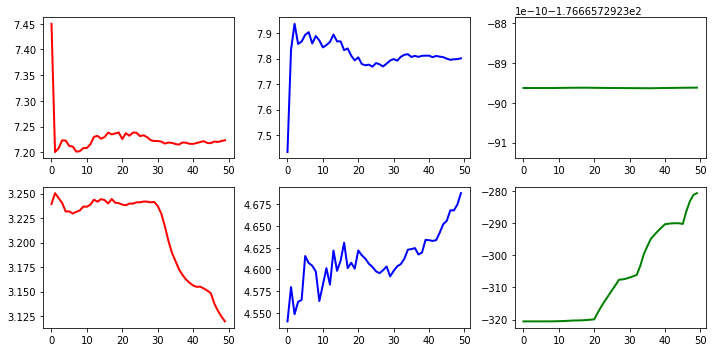

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axes[0][0].plot(err_train_ridge, "r", linewidth=2, label="Train")
axes[0][1].plot(err_test_ridge, "b", linewidth=2, label="Test")
axes[0][2].plot(err_cv_ridge, "g", linewidth=2, label="CV")

axes[1][0].plot(err_train_lasso, "r", linewidth=2, label="Train")
axes[1][1].plot(err_test_lasso, "b", linewidth=2, label="Test")
axes[1][2].plot(err_cv_lasso, "g", linewidth=2, label="CV")


fig.tight_layout()